In [84]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('ggplot')
pd.set_option('display.max_columns',None)
import seaborn as sns

In [85]:
ames = pd.read_csv('data/housing_clean.csv')

In [86]:
ames.head()

,GrLivArea,SalePrice,Utilities,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold
0,856,126000,AllPub,1Fam,1Story,6,6,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,TA,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,TA,4,Typ,1,Gd,Detchd,1939.0,Unf,2.0,399.0,TA,TA,Y,0,0,0,0,166,0,None,None,None,0,3,2010
1,1049,139500,AllPub,TwnhsE,1Story,5,5,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,Gd,TA,CBlock,Gd,TA,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,TA,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,Gd,5,Typ,0,None,Attchd,1984.0,Fin,1.0,266.0,TA,TA,Y,0,105,0,0,0,0,None,None,None,0,2,2009
2,1001,124900,AllPub,1Fam,1Story,5,9,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,BrkTil,TA,TA,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,Ex,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,Gd,5,Typ,0,None,Detchd,1930.0,Unf,1.0,216.0,TA,Po,N,154,0,42,86,0,0,None,None,None,0,11,2007
3,1039,114000,AllPub,1Fam,2Story,4,8,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,Gd,BrkTil,Fa,TA,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,Gd,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,TA,6,Typ,0,None,Detchd,1940.0,Unf,1.0,281.0,TA,TA,N,0,0,168,0,111,0,None,None,None,0,5,2009
4,1665,227000,AllPub,1Fam,2Story,8,6,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,Ex,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,Gd,6,Typ,0,None,Attchd,2001.0,Fin,2.0,528.0,TA,TA,Y,0,45,0,0,0,0,None,None,None,0,11,2009


#### These are the quality categorical features
- BsmtQual BsmtCond HeatingQC KitchenQual FireplaceQu GarageQual GarageCond  PoolQC

In [87]:
ames.BsmtQual.unique()

array(['TA', 'Gd', 'Fa', 'None', 'Ex', 'Po'], dtype=object)

In [88]:
# need to dummify MoSold 
# need to create feature for year built to age 
 # maybe yrsold - yrbuilt
# need to create feature for garage yr to age garage
# add feature - has basement yes no
# same for pool, garage, 
# consider doing linear models for subsets data garage and basement etc
    # This could show the actual effect of quality on prices


# As advised in the documentation for the original project, 
# we have dropped all houses with an above ground living area 
# greater than 4000 square feet, dropping a total of 5 
# observatinons. Three of them are true outliers (Partial 
# Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately).

## Making the quality categorical features numerical

In [89]:
ames_rank = ames.filter(regex='Qual$|QC$|Qu$|Cond$').drop(['OverallQual','OverallCond'], axis=1)

ames_rank.replace({'None':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

In [90]:
ames_rank.dtypes

ExterQual      int64
ExterCond      int64
BsmtQual       int64
BsmtCond       int64
HeatingQC      int64
KitchenQual    int64
FireplaceQu    int64
GarageQual     int64
GarageCond     int64
PoolQC         int64
dtype: object

### update original dataframe with ranking

In [91]:
ames[ames_rank.columns] =ames_rank

In [92]:
ames.BsmtQual.unique()

array([3, 4, 2, 0, 5, 1])

In [93]:
ames.head()

,GrLivArea,SalePrice,Utilities,BldgType,HouseStyle,OverallQual,OverallCond,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold
0,856,126000,AllPub,1Fam,1Story,6,6,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,3,3,CBlock,3,3,No,Rec,238.0,Unf,0.0,618.0,856.0,GasA,3,Y,SBrkr,856,0,0,1.0,0.0,1,0,2,1,3,4,Typ,1,4,Detchd,1939.0,Unf,2.0,399.0,3,3,Y,0,0,0,0,166,0,0,None,None,0,3,2010
1,1049,139500,AllPub,TwnhsE,1Story,5,5,1984,Gable,CompShg,HdBoard,HdBoard,BrkFace,149.0,4,3,CBlock,4,3,Mn,GLQ,552.0,ALQ,393.0,104.0,1049.0,GasA,3,Y,SBrkr,1049,0,0,1.0,0.0,2,0,2,1,4,5,Typ,0,0,Attchd,1984.0,Fin,1.0,266.0,3,3,Y,0,105,0,0,0,0,0,None,None,0,2,2009
2,1001,124900,AllPub,1Fam,1Story,5,9,2007,Hip,CompShg,MetalSd,MetalSd,None,0.0,4,3,BrkTil,3,3,No,ALQ,737.0,Unf,0.0,100.0,837.0,GasA,5,Y,SBrkr,1001,0,0,0.0,0.0,1,0,2,1,4,5,Typ,0,0,Detchd,1930.0,Unf,1.0,216.0,3,1,N,154,0,42,86,0,0,0,None,None,0,11,2007
3,1039,114000,AllPub,1Fam,2Story,4,8,2003,Gable,CompShg,MetalSd,MetalSd,None,0.0,4,4,BrkTil,2,3,No,Unf,0.0,Unf,0.0,405.0,405.0,GasA,4,Y,SBrkr,717,322,0,0.0,0.0,1,0,2,1,3,6,Typ,0,0,Detchd,1940.0,Unf,1.0,281.0,3,3,N,0,0,168,0,111,0,0,None,None,0,5,2009
4,1665,227000,AllPub,1Fam,2Story,8,6,2001,Gable,CompShg,VinylSd,VinylSd,None,0.0,4,3,PConc,4,3,No,GLQ,643.0,Unf,0.0,167.0,810.0,GasA,5,Y,SBrkr,810,855,0,1.0,0.0,2,1,3,1,4,6,Typ,0,0,Attchd,2001.0,Fin,2.0,528.0,3,3,Y,0,45,0,0,0,0,0,None,None,0,11,2009


In [169]:
ames.SalePrice = np.log(ames.SalePrice)
ames.GrLivArea = np.log(ames.GrLivArea)

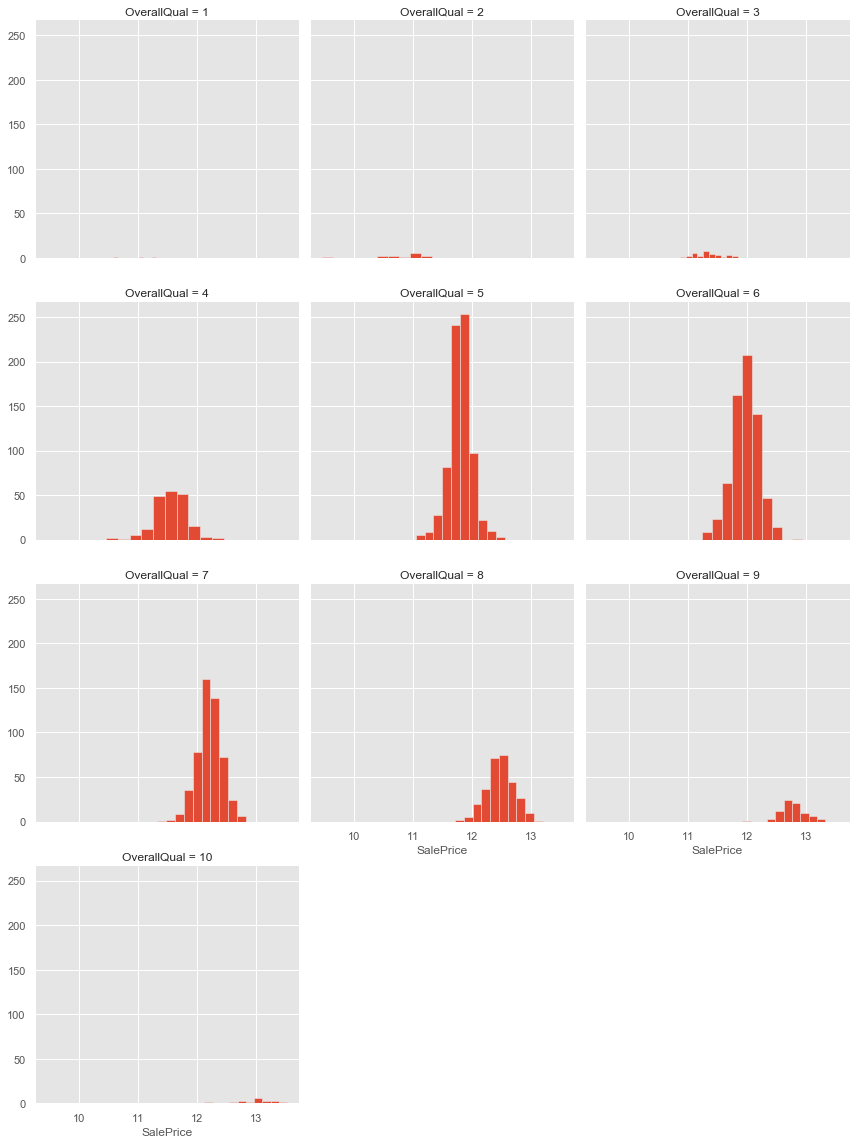

In [95]:
g = sns.FacetGrid(ames, col="OverallQual", col_wrap=3,height=4)
g = (g.map(plt.hist, "SalePrice"))

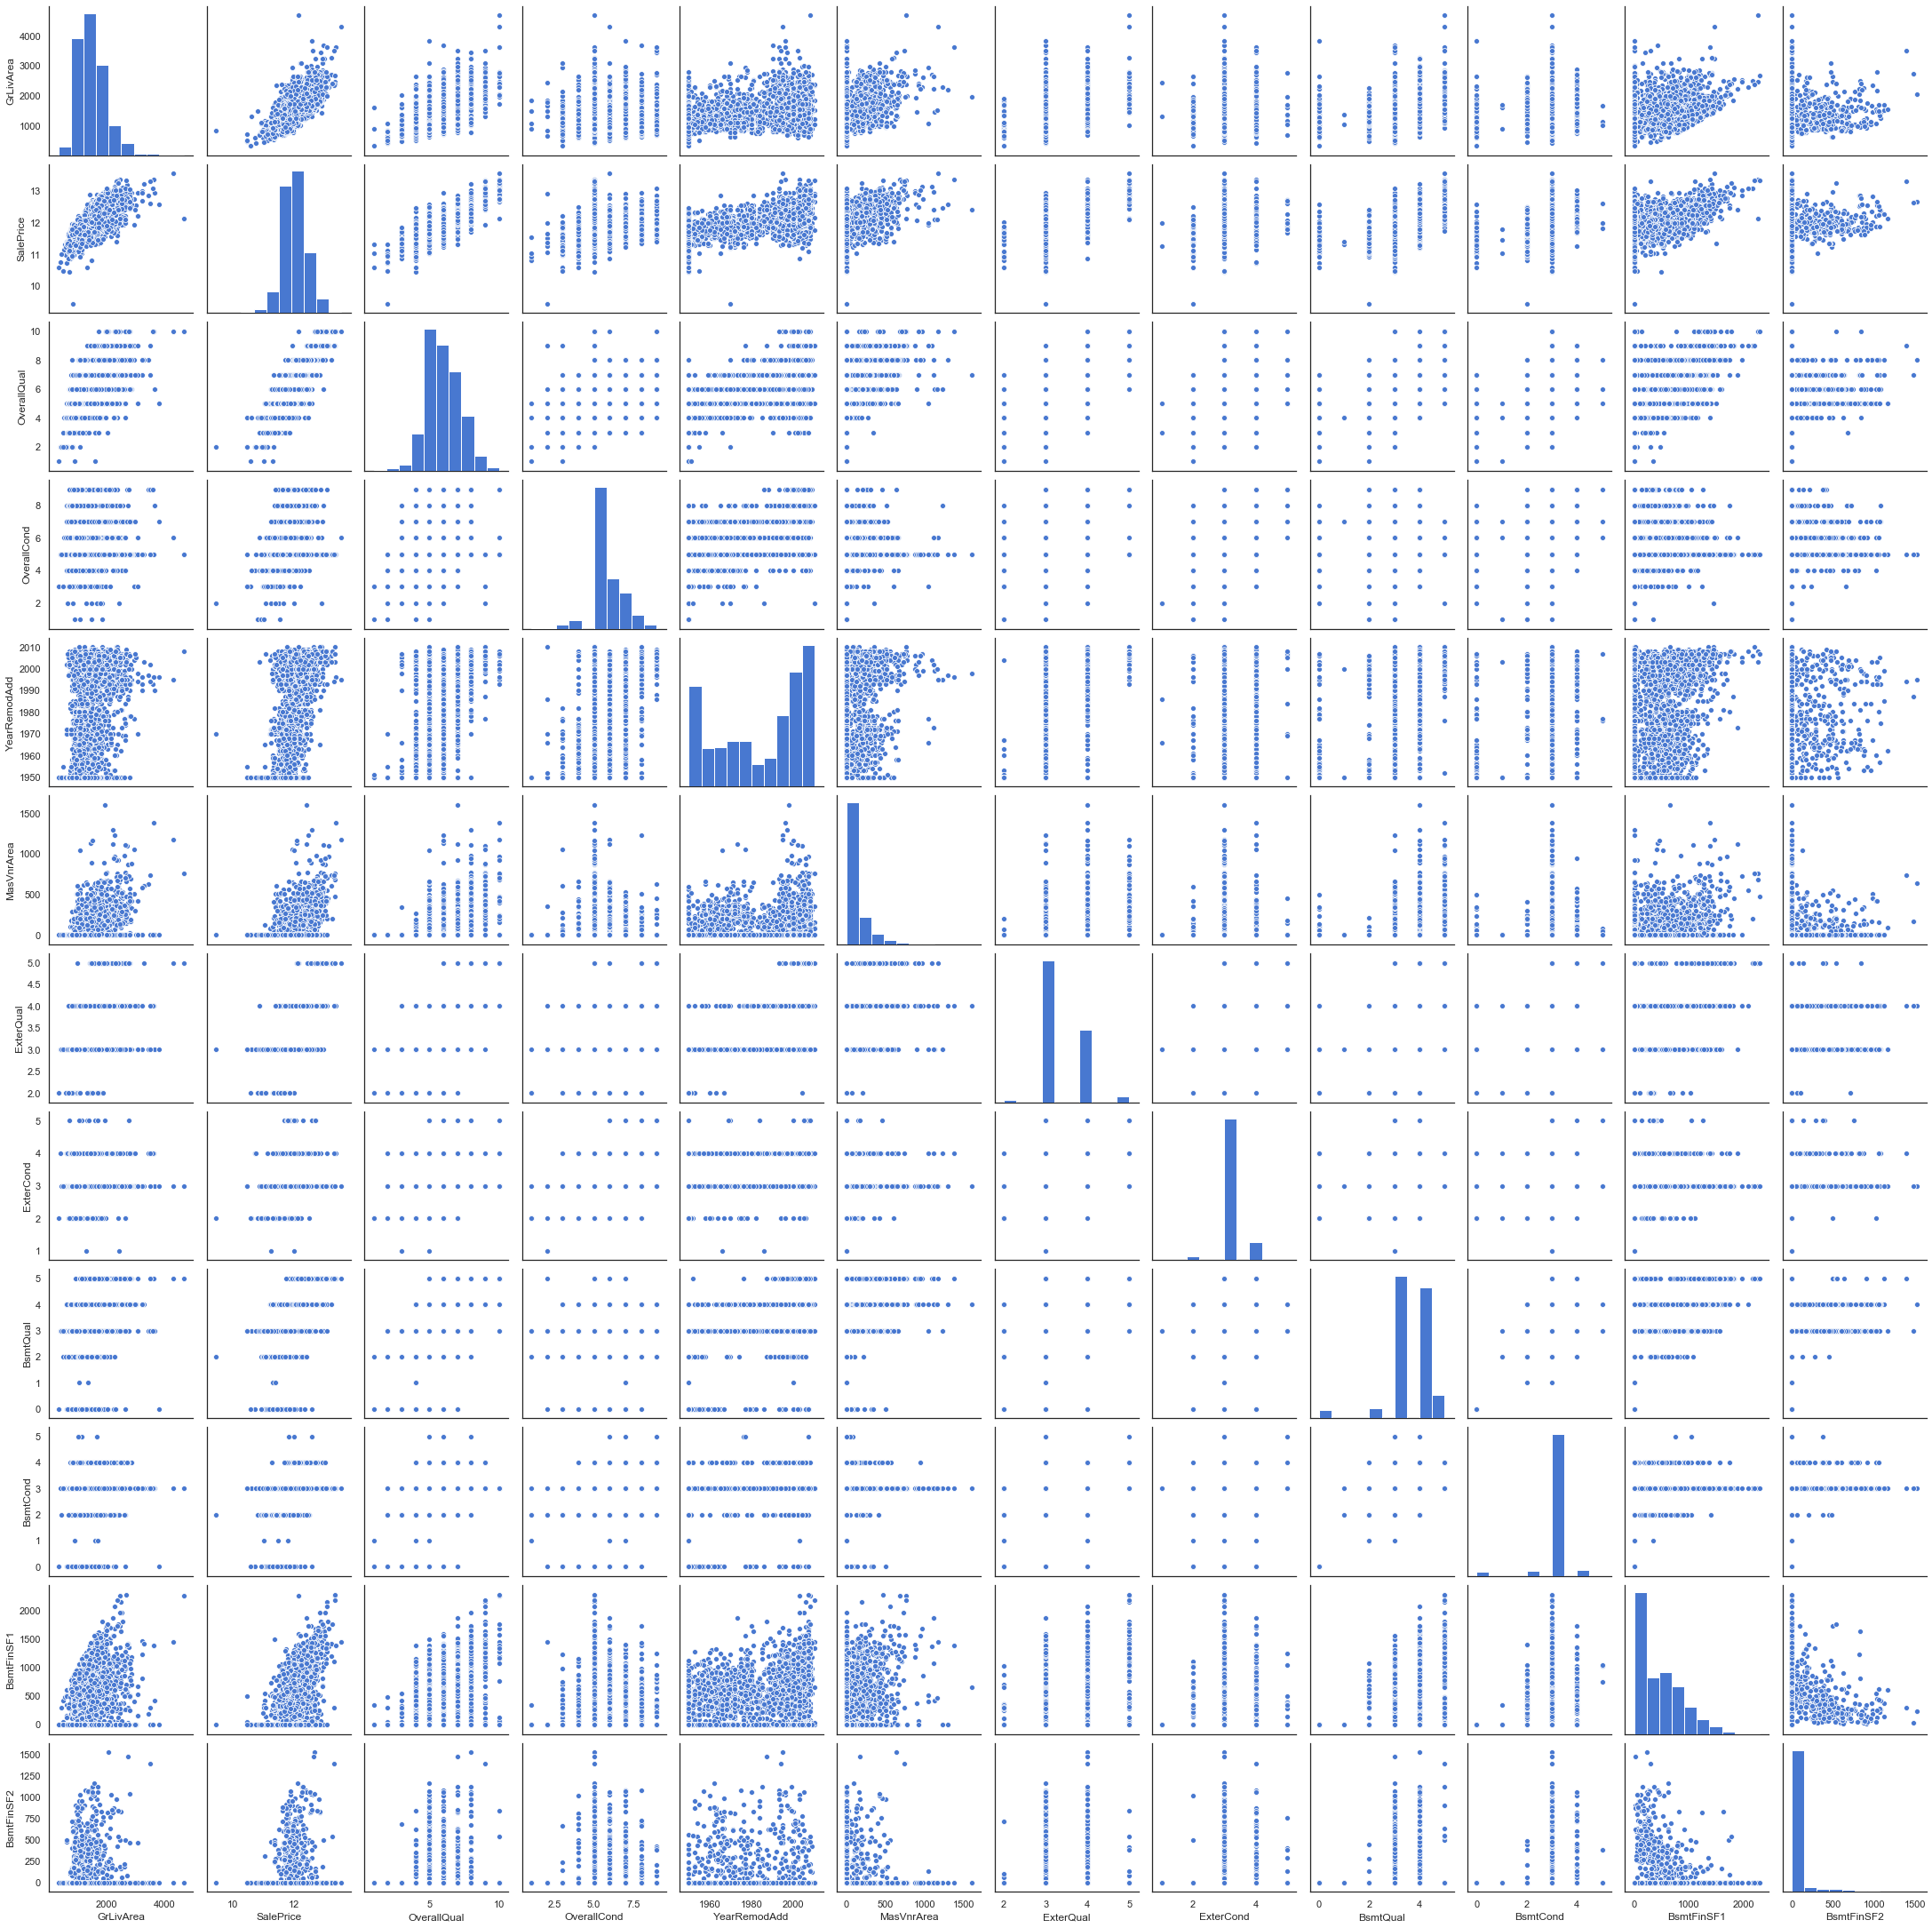

In [70]:
sns.set(
    style="white", 
    palette="muted", 
    color_codes=True
)
sns.pairplot(
    ames[list(ames.columns)[0:24]]
)

In [108]:
from sklearn.feature_selection import f_regression
F_values, p_values = f_regression(num_features, ames['SalePrice'])
pd.Series(p_values, index=num_features.columns).sort_values()

GrLivArea         0.000000e+00
OverallQual       0.000000e+00
GarageCars        0.000000e+00
ExterQual         0.000000e+00
KitchenQual      5.510576e-309
GarageArea       3.937840e-304
TotalBsmtSF      7.042900e-300
1stFlrSF         3.524781e-278
BsmtQual         1.010157e-271
FullBath         1.759486e-223
YearRemodAdd     2.733839e-215
FireplaceQu      1.224410e-193
Fireplaces       9.500746e-163
TotRmsAbvGrd     2.217531e-162
HeatingQC        4.542768e-143
MasVnrArea       9.988245e-121
BsmtFinSF1       1.647809e-120
GarageQual        2.692832e-76
GarageCond        1.055021e-69
WoodDeckSF        3.192601e-69
OpenPorchSF       2.387576e-59
HalfBath          2.077921e-58
BsmtFullBath      2.732435e-49
2ndFlrSF          5.821745e-47
BsmtCond          4.353113e-44
BedroomAbvGr      5.706197e-24
BsmtUnfSF         3.619413e-20
EnclosedPorch     1.547448e-12
KitchenAbvGr      4.372485e-10
ScreenPorch       1.184938e-09
PoolQC            2.155164e-03
OverallCond       9.954525e-03
LowQualF

In [109]:
pd.Series(F_values, index=num_features.columns).sort_values()

SalePrice       -8.798763e+15
YrSold           2.658497e-02
MiscVal          4.802766e-01
MoSold           9.580530e-01
BsmtHalfBath     1.277239e+00
BsmtFinSF2       2.275423e+00
PoolArea         2.700756e+00
ExterCond        3.476016e+00
3SsnPorch        3.644954e+00
LowQualFinSF     3.773246e+00
OverallCond      6.652886e+00
PoolQC           9.431513e+00
ScreenPorch      3.726829e+01
KitchenAbvGr     3.924261e+01
EnclosedPorch    5.048552e+01
BsmtUnfSF        8.604070e+01
BedroomAbvGr     1.040113e+02
BsmtCond         2.014882e+02
2ndFlrSF         2.157268e+02
BsmtFullBath     2.273206e+02
HalfBath         2.732129e+02
OpenPorchSF      2.779862e+02
WoodDeckSF       3.286454e+02
GarageCond       3.311361e+02
GarageQual       3.655068e+02
BsmtFinSF1       6.069310e+02
MasVnrArea       6.081665e+02
HeatingQC        7.377354e+02
TotRmsAbvGrd     8.539972e+02
Fireplaces       8.562527e+02
FireplaceQu      1.050932e+03
YearRemodAdd     1.193956e+03
FullBath         1.249531e+03
BsmtQual  

In [107]:
ames.GrLivArea

0        856
1       1049
2       1001
3       1039
4       1665
        ... 
2572     952
2573    1733
2574    2002
2575    1842
2576    1911
Name: GrLivArea, Length: 2577, dtype: int64

In [63]:
list(ames.columns)[0:8]

['GrLivArea',
 'SalePrice',
 'Utilities',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearRemodAdd']

# def to sort feature types

In [103]:
def feature_type():
    """ Returns a list of numerical and categorical features,
    """
    # Numerical Features
    ames_num = ames.select_dtypes(include=['int64','float64'])

    # Categorical Features
    ames_cat = ames.select_dtypes(include=['object'])
    
    return ames_num, ames_cat

num_features, cat_features = feature_type()

In [104]:
num_features.head()

,GrLivArea,SalePrice,OverallQual,OverallCond,YearRemodAdd,MasVnrArea,ExterQual,ExterCond,BsmtQual,BsmtCond,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,MoSold,YrSold
0,856,11.744037,6,6,1950,0.0,3,3,3,3,238.0,0.0,618.0,856.0,3,856,0,0,1.0,0.0,1,0,2,1,3,4,1,4,2.0,399.0,3,3,0,0,0,0,166,0,0,0,3,2010
1,1049,11.845820,5,5,1984,149.0,4,3,4,3,552.0,393.0,104.0,1049.0,3,1049,0,0,1.0,0.0,2,0,2,1,4,5,0,0,1.0,266.0,3,3,0,105,0,0,0,0,0,0,2,2009
2,1001,11.735269,5,9,2007,0.0,4,3,3,3,737.0,0.0,100.0,837.0,5,1001,0,0,0.0,0.0,1,0,2,1,4,5,0,0,1.0,216.0,3,1,154,0,42,86,0,0,0,0,11,2007
3,1039,11.643954,4,8,2003,0.0,4,4,2,3,0.0,0.0,405.0,405.0,4,717,322,0,0.0,0.0,1,0,2,1,3,6,0,0,1.0,281.0,3,3,0,0,168,0,111,0,0,0,5,2009
4,1665,12.332705,8,6,2001,0.0,4,3,4,3,643.0,0.0,167.0,810.0,5,810,855,0,1.0,0.0,2,1,3,1,4,6,0,0,2.0,528.0,3,3,0,45,0,0,0,0,0,0,11,2009


In [170]:
X = pd.get_dummies(ames.drop(['SalePrice', 'GarageYrBlt'], axis=1), drop_first=True)
y = ames['SalePrice']

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [172]:
from sklearn.linear_model import Lasso
# Since this is an imbalanced dataset, setting class_weight='balanced' will give us a better result
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
lm = Lasso(normalize=True, alpha = 0.000001)
lm.fit(X_train, y_train)
y_predict = lm.predict(X_test)

In [173]:
for ftname, beta in zip(X_train.columns, lm.coef_):
    print(f"{ftname} >> {beta}")

GrLivArea >> 0.036669127120539255
OverallQual >> 0.004744684963991682
OverallCond >> 0.0028074608951368894
YearRemodAdd >> 7.955244984631142e-05
MasVnrArea >> 4.910320010250761e-06
ExterQual >> 0.0015131483867295565
ExterCond >> -0.0007369980080710598
BsmtQual >> 0.003317083248307311
BsmtCond >> 0.0004755804724370124
BsmtFinSF1 >> 2.8890798642956067e-06
BsmtFinSF2 >> 4.027601056627419e-06
BsmtUnfSF >> -0.0
TotalBsmtSF >> 7.440330248960736e-06
HeatingQC >> 0.0011100037832841871
1stFlrSF >> -0.0
2ndFlrSF >> 1.1805768411974007e-06
LowQualFinSF >> -5.836800020444666e-06
BsmtFullBath >> 0.0015740175396553877
BsmtHalfBath >> 6.543712210439561e-05
FullBath >> 0.001784962096369214
HalfBath >> 0.001979088460496998
BedroomAbvGr >> -0.00030185763770428374
KitchenAbvGr >> -0.005528084195290337
KitchenQual >> 0.001996572637331124
TotRmsAbvGrd >> 0.0002504624207084494
Fireplaces >> 0.002151002131576082
FireplaceQu >> 0.0002002240312897371
GarageCars >> 0.0014312314483309967
GarageArea >> 8.598052519

In [174]:
ames.GarageYrBlt.dtype

dtype('O')

In [175]:
lm.score(X_train, y_train)

0.9211970010189223

In [176]:
lm.score(X_test, y_test)

0.8662207466356705

In [177]:
type(lm.coef_)

numpy.ndarray

In [178]:
np.sort(lm.coef_)

array([-4.45021530e-02, -1.49861701e-02, -1.39377199e-02, -1.25141144e-02,
       -1.12500967e-02, -9.55845325e-03, -8.28037082e-03, -6.56131025e-03,
       -5.52808420e-03, -5.46004038e-03, -4.21175906e-03, -3.98802223e-03,
       -3.71502618e-03, -3.71332777e-03, -3.33884741e-03, -3.27424750e-03,
       -3.23369897e-03, -2.75724269e-03, -2.54754680e-03, -2.36095500e-03,
       -2.25119037e-03, -1.90084238e-03, -1.77096516e-03, -1.32934339e-03,
       -1.09083241e-03, -1.04010356e-03, -9.61023672e-04, -7.36998008e-04,
       -7.17533819e-04, -6.70948213e-04, -6.45575875e-04, -6.41182321e-04,
       -6.33288579e-04, -5.46479056e-04, -5.31636032e-04, -4.75871547e-04,
       -3.01857638e-04, -2.82801459e-04, -2.68650220e-04, -2.40094042e-04,
       -1.78854986e-04, -1.73806100e-04, -8.29361571e-05, -1.68195436e-05,
       -5.83680002e-06, -5.70003536e-06, -4.24159797e-06, -8.20552448e-07,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -

In [179]:
ames.loc[ames.GarageYrBlt =='None'].shape

(127, 64)

In [180]:
ames.loc[(ames.GarageYrBlt =='None') & (ames.GarageArea == 0)].shape

(127, 64)

Text(0.5, 1.0, 'Feature importance using Lasso Model')

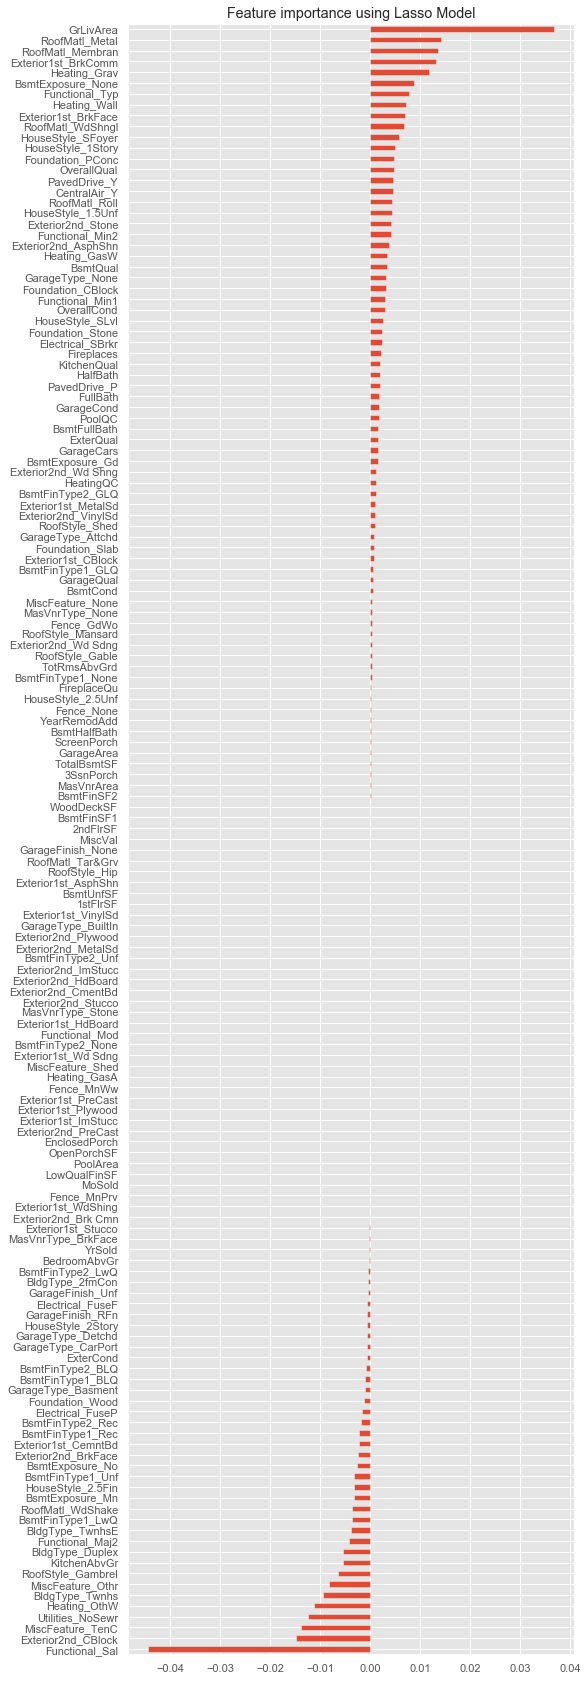

In [181]:
coef = pd.Series(lm.coef_, index = X_train.columns)
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (8.0, 30.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [ ]:
from sklearn import ensemble # note not in tree subpackage
randomForest = ensemble.RandomForestClassifier()
bagging      = ensemble.BaggingClassifier()


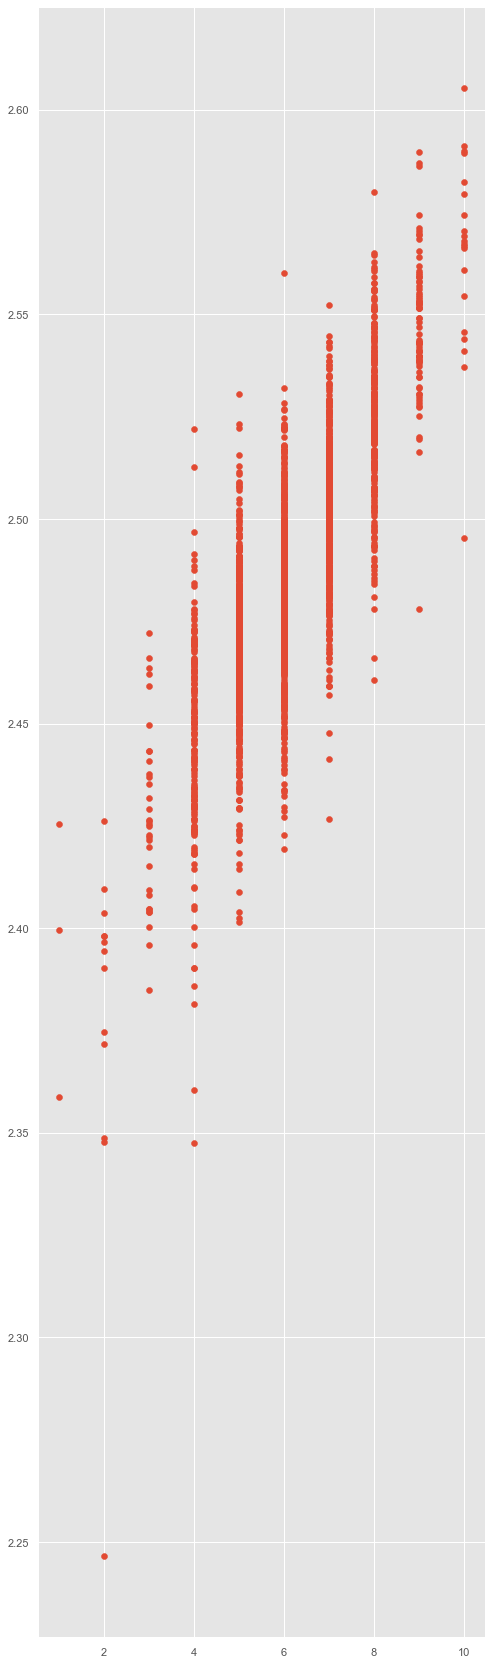

In [182]:
plt.scatter(ames.OverallQual, ames.SalePrice)

In [3]:
import clean1

In [2]:
hello()

hi there
